In [218]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import vtk as vtk

In [219]:
%matplotlib widget

# Try to load case with pyvista.read

PyVista is smart enough to allow the load of an OpenFOAM case (.foam extension here)

In [220]:
# Import the OpenFOAM example case
case = pv.read('./case.foam')

In [221]:
case.keys()

['internalMesh']

In [222]:
mesh = case[0]

In [223]:
mesh

UnstructuredGrid (0x1726c967c40)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	10

* It looks like the number of arrays is doubled here, there is 2 times the `Data Arrays` (don't know why)
* It looks like the case is loaded for `time=0`, I don't know how to change the time value.

Here is for example below the U field where it's 0 everywhere expect at the inlet which is the intial condtion at `time=0`.

In [224]:
 mesh.plot(scalars='U',cpos='xy')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.


# Load the case with `vtkOpenFOAMReader`

In [225]:
def createTimeList(array): # T the list we want to create and array the vtkDoubleArray containing the time values
    T = []
    for i in range(0, array.GetMaxId()+1):
        T.append(array.GetValue(i))
    return T

In [226]:
reader = vtk.vtkOpenFOAMReader()
reader.SetFileName("C:/Users/tondu/Desktop/PyVist-INSA-main/case.foam")
reader.UpdateInformation()
time = reader.GetTimeValues() # All the time values of the simulation in the form of a vtkDoubleArray
reader.SetTimeValue(time.GetValue(2)) # Set time value to whichever one we want to visualize 
reader.Update()
multi_block = pv.wrap(reader.GetOutput()) 
print(time) 

vtkDoubleArray (0000017274E88D60)
  Debug: Off
  Modified Time: 5471402
  Reference Count: 2
  Registered Events: (none)
  Name: (none)
  Data type: double
  Size: 3
  MaxId: 2
  NumberOfComponents: 1
  Information: 0000000000000000
  Name: (none)
  Number Of Components: 1
  Number Of Tuples: 3
  Size: 3
  MaxId: 2
  LookupTable: (none)




In [227]:
T = createTimeList(time) # This gives us a list of all the time values
print(T)

[0.0, 500.0, 1000.0]


In [228]:
mesh = multi_block[0]
mesh

UnstructuredGrid (0x1726c967820)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	10

We can notice that we have the same fields twice. 
Each field is stored as both point data and cell data, this means that we have 10 N arrays instead of 5.

Let's create two datasets: one that only contains the cell data and one that only contains the point data.

In [229]:
# This dataset will only contain cell data
multi_block = pv.wrap(reader.GetOutput()) 
mesh_cell = multi_block[0]
mesh_cell.clear_point_data()
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	5

In [230]:
# This dataset will only contain point data
multi_block = pv.wrap(reader.GetOutput()) 
mesh_point = multi_block[0]
mesh_point.clear_cell_data()
mesh_point

UnstructuredGrid (0x1726c983040)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	5

In [231]:
# n = reader.GetNumberOfPatchArrays()
# reader.SetPatchArrayStatus(reader.GetPatchArrayName(0), 1) # 0 for disabled, 1 for enabled 

## Show the mesh 

In [232]:
# Create a plotting object to display vtk meshes or numpy arrays
p = pv.Plotter()
# Show the mesh in wireframe style
p.add_mesh(mesh, style="wireframe", color="w")
# View in the xy plane
p.view_xy()
# Show the axes
p.add_axes()
# Display the plotting window
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot the domain with a scalar field


In [233]:
# Plot the domain based on the cell data
p = pv.Plotter()
p.add_mesh(mesh_cell, scalars='U')
p.view_xy()
p.add_axes()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [234]:
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	6

In [235]:
# Plot the domain based on the point data
p = pv.Plotter()
p.add_mesh(mesh_point, scalars='U')
p.view_xy()
p.add_axes()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [236]:
mesh_point

UnstructuredGrid (0x1726c983040)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	6

### Another one with the mesh surimposed

In [237]:
p3 = pv.Plotter()
p3.add_mesh(mesh,scalars='U', show_edges=True)
p3.view_xy()
p3.add_axes()
p3.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Plot the velocity field using glyphs

In [238]:
geom = pv.Arrow()
glyphs = mesh.glyph(orient='U',scale='U-normed',factor=0.0005,geom=geom)
p4 = pv.Plotter()
p4.add_mesh(glyphs)
p4.view_xy()
p4.add_axes()
p4.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Plot over line example

In [239]:
# Create the 2 points defining the line
a = [0, 0, 0]
b = [0, mesh.bounds[3], 0]

# Create a Line object
line = pv.Line(a, b)

In [240]:
mesh.bounds

[-0.020600000396370888,
 0.28999999165534973,
 -0.02539999969303608,
 0.02539999969303608,
 -0.0005000000237487257,
 0.0005000000237487257]

Let's show the line in the computational domain

In [241]:
p5 = pv.Plotter()
p5.add_mesh(mesh, style="wireframe", color='white')
# Show the line in red in the domain
p5.add_mesh(line, color="r", line_width=10)
p5.view_xy()
p5.add_axes()
p5.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Let's make a plot overline ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
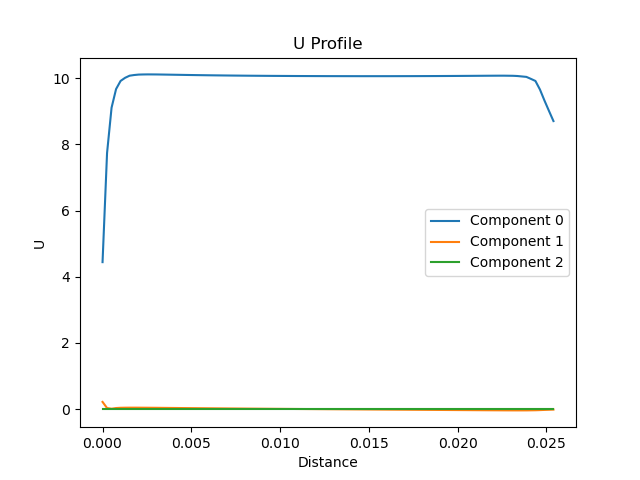

In [242]:
mesh.plot_over_line(a, b, resolution=100, scalars='U')

### How to access the vector components

In [243]:
mesh_cell.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : U-normed
Active Vectors  : U
Active Texture  : None
Active Normals  : None
Contains arrays :
    U                       float32  (12225, 3)           VECTORS
    epsilon                 float32  (12225,)
    k                       float32  (12225,)
    nut                     float32  (12225,)
    p                       float32  (12225,)
    U-normed                float32  (12225,)             SCALARS

In [244]:
ux = mesh_cell['U'][:,0]
uy = mesh_cell['U'][:,1]
uz = mesh_cell['U'][:,2]

mesh_cell.cell_data["ux"] = ux
mesh_cell.cell_data["uy"] = uy
mesh_cell.cell_data["uz"] = uz

mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	9

In [245]:
mesh_point.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : U-normed
Active Vectors  : U
Active Texture  : None
Active Normals  : None
Contains arrays :
    U                       float32  (25012, 3)           VECTORS
    epsilon                 float32  (25012,)
    k                       float32  (25012,)
    nut                     float32  (25012,)
    p                       float32  (25012,)
    U-normed                float32  (25012,)             SCALARS

In [246]:
ux = mesh_point['U'][:,0]
uy = mesh_point['U'][:,1]
uz = mesh_point['U'][:,2]

mesh_point.point_data["ux"] = ux
mesh_point.point_data["uy"] = uy
mesh_point.point_data["uz"] = uz

mesh_point

UnstructuredGrid (0x1726c983040)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	9

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
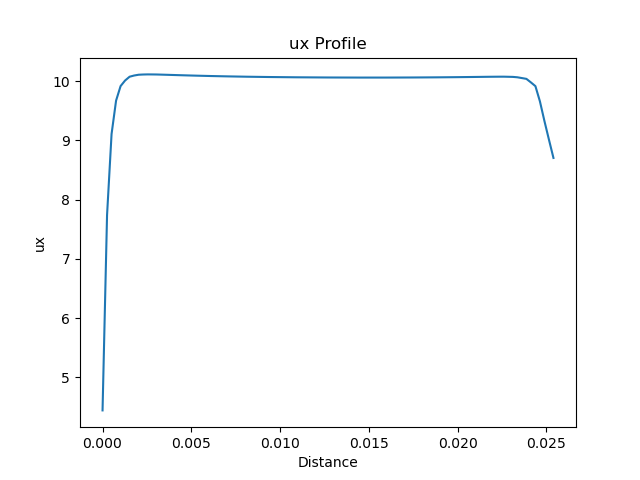

In [247]:
mesh_point.plot_over_line(a, b, resolution=100, scalars='ux')

## Plot a scalar over a circular arc

In [248]:
# Make two points at the bounds of the mesh and one at the center to
# construct a circular arc.
normal = [0, 0, 1]
polar = [0.02, 0, 0]
center = [0, 0, 0]
angle = 100.0

# Preview how this circular arc intersects this mesh
arc = pv.CircularArcFromNormal(center, 100, normal, polar, angle)

p = pv.Plotter()
p.add_mesh(mesh, style="wireframe", color="w")
p.add_mesh(arc, color="r")
a = arc.points[0]
b = arc.points[-1]
p.add_point_labels(
    [a, b], ["A", "B"], font_size=48, point_color="red", text_color="red"
)
p.view_xy()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Let's see what's in the arc object.

In [249]:
arc

PolyData (0x171e1d8cee0)
  N Cells:	1
  N Points:	101
  X Bounds:	-3.473e-03, 2.000e-02
  Y Bounds:	0.000e+00, 2.000e-02
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	2

I don't know how to add another plot on the same figure, it's perhaps only possible to plot one scalar or one vector at a time with this API.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
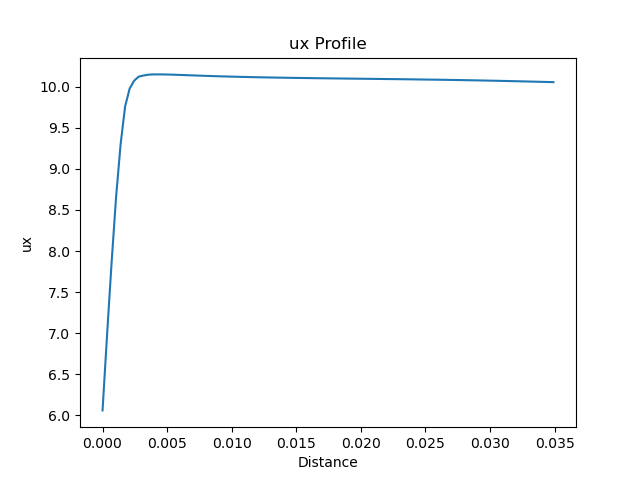

In [250]:
mesh_point.plot_over_circular_arc_normal(center, 100, normal, polar, angle,scalars='ux')
#mesh_point.plot_over_circular_arc_normal(center, 100, normal, polar, angle, scalars='uy')

So let's try another way and create the figure ourself (there may be better ways to do this by the way).

In [251]:
sampled = pv.DataSetFilters.sample_over_circular_arc_normal(mesh_point,center,100,normal,polar,angle,)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
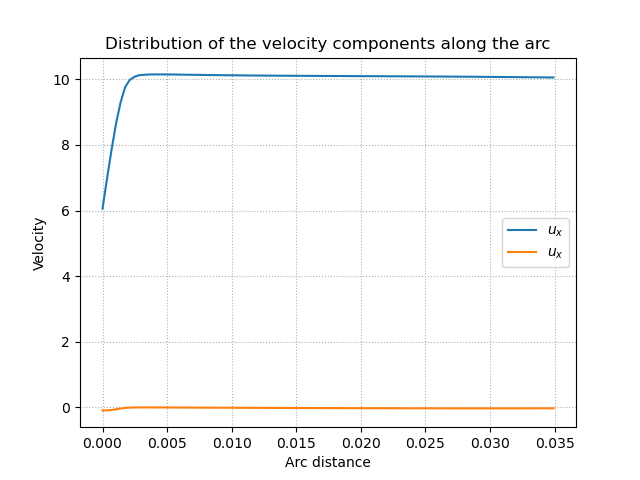

In [252]:
plt.figure()
plt.plot(sampled['Distance'],sampled['ux'],label='$u_x$')
plt.plot(sampled['Distance'],sampled['uy'],label='$u_x$')
plt.xlabel('Arc distance')
plt.ylabel('Velocity')
plt.title('Distribution of the velocity components along the arc')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()

## Fields

In [253]:
### k field 

p6 = pv.Plotter()
p6.add_mesh(mesh_cell,scalars='k')
p6.view_xy()
p6.add_axes()
p6.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [254]:
### espilon field 

p6 = pv.Plotter()
p6.add_mesh(mesh_cell,scalars='epsilon')
p6.view_xy()
p6.add_axes()
p6.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [255]:
### nut field 

p6 = pv.Plotter()
p6.add_mesh(mesh_cell,scalars='nut')
p6.view_xy()
p6.add_axes()
p6.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [256]:
### pressure field 

p6 = pv.Plotter()
p6.add_mesh(mesh_cell,scalars='p')
p6.view_xy()
p6.add_axes()
p6.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Let's plot the streamlines

In [257]:
X_center = (mesh.bounds[0]+mesh.bounds[1])/2
Y_center = (mesh.bounds[2]+mesh.bounds[3])/2
Z_center = (mesh.bounds[4]+mesh.bounds[5])/2
centers = [X_center, Y_center, Z_center] 


face = mesh.slice(normal='x') # "normal" should be set as the direction of the flow
slices = mesh.slice_along_axis(n=8, axis="x") # axis is the axis of the flow
faces = slices.combine() # converts Multiblock into UnstructuredGrid 

str1 = mesh.streamlines_from_source(faces, vectors='U') # streamlines using multiple surfaces
str2 = mesh.streamlines_from_source(face, vectors='U') # streamlines using a singular surface
# both require a dataset for the surface

str3 = mesh.streamlines( 
n_points=100,
vectors='U',
pointa=(mesh.bounds[0], mesh.bounds[2], centers[2]),
pointb=(mesh.bounds[0], mesh.bounds[3], centers[2])
)  # Streamlines using a line

We'll compare between the streamlines obtained from one singular surface (str1) and those obtained using a higher number of equidistant parallel surfaces (str2). 
The most accurate of the two cases is the one that resembles what we obtain with ParaView the most.

In [258]:
# Streamlines obtained from a higher number of equidistant parallel surfaces
p = pv.Plotter()
p.add_mesh(mesh, color="w")
p.add_mesh(str1.tube(radius=0.0004))
# View in the xy plane
p.view_xy()
# Show the axes
p.add_axes()
# Display the plotting window
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [259]:
# Streamlines obtained from one singular surface
p = pv.Plotter()
p.add_mesh(mesh, color="w")
p.add_mesh(str2.tube(radius=0.0004))
# View in the xy plane
p.view_xy()
# Show the axes
p.add_axes()
# Display the plotting window
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Let's determine the friction velocity

In [260]:
wall = mesh.slice(normal='y', origin=(X_center, mesh.bounds[3], 0))
wall2 = mesh.slice(normal='-y', origin=(X_center, mesh.bounds[2], 0))
wall3 = mesh.slice(normal='-y', origin=(X_center, 0, 0))
p = pv.Plotter()
p.add_mesh(wall)
p.add_mesh(wall2)
p.add_mesh(wall3)
p.view_xy()
p.add_axes()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [261]:
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	9

In [262]:
def gradients_to_dict(arr):
    keys = np.array(["dux/dx", "dux/dy", "dux/dz", "duy/dx", "duy/dy", "duy/dz", "duz/dx", "duz/dy", "duz/dz"])
    keys = keys.reshape((3,3))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

def gradients_to_dict2(arr):
    keys = np.array(["dU/dx", "dU/dy", "dU/dz"])
    keys = keys.reshape((3,1))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

In [263]:
# deriv will contain the data from the gradient of U (9 components)
deriv_cell = mesh_cell.compute_derivative(scalars="U")
# deriv2 will contain the data from the gradient of U-normed (3 components)
deriv2_cell = mesh_cell.compute_derivative(scalars="U-normed")

grad_cell = gradients_to_dict(deriv_cell["gradient"])
grad2_cell = gradients_to_dict2(deriv2_cell["gradient"])

mesh_cell.cell_data["dU/dx"] = grad2_cell["dU/dx"]
mesh_cell.cell_data["dU/dy"] = grad2_cell["dU/dy"]
mesh_cell.cell_data["dU/dz"] = grad2_cell["dU/dz"]
mesh_cell.cell_data["dux/dx"] = grad_cell["dux/dx"]
mesh_cell.cell_data["dux/dy"] = grad_cell["dux/dy"]
mesh_cell.cell_data["dux/dz"] = grad_cell["dux/dz"]
mesh_cell.cell_data["duy/dx"] = grad_cell["duy/dx"]
mesh_cell.cell_data["duy/dy"] = grad_cell["duy/dy"]
mesh_cell.cell_data["duy/dz"] = grad_cell["duy/dz"]
mesh_cell.cell_data["duz/dx"] = grad_cell["duz/dx"]
mesh_cell.cell_data["duz/dy"] = grad_cell["duz/dy"]
mesh_cell.cell_data["duz/dz"] = grad_cell["duz/dz"]

mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	21

In [264]:
# deriv will contain the data from the gradient of U (9 components)
deriv_point = mesh_point.compute_derivative(scalars="U")
# deriv2 will contain the data from the gradient of U-normed (3 components)
deriv2_point = mesh_point.compute_derivative(scalars="U-normed")

grad_point = gradients_to_dict(deriv_point["gradient"])
grad2_point = gradients_to_dict2(deriv2_point["gradient"])

mesh_point.point_data["dU/dx"] = grad2_point["dU/dx"]
mesh_point.point_data["dU/dy"] = grad2_point["dU/dy"]
mesh_point.point_data["dU/dz"] = grad2_point["dU/dz"]
mesh_point.point_data["dux/dx"] = grad_point["dux/dx"]
mesh_point.point_data["dux/dy"] = grad_point["dux/dy"]
mesh_point.point_data["dux/dz"] = grad_point["dux/dz"]
mesh_point.point_data["duy/dx"] = grad_point["duy/dx"]
mesh_point.point_data["duy/dy"] = grad_point["duy/dy"]
mesh_point.point_data["duy/dz"] = grad_point["duy/dz"]
mesh_point.point_data["duz/dx"] = grad_point["duz/dx"]
mesh_point.point_data["duz/dy"] = grad_point["duz/dy"]
mesh_point.point_data["duz/dz"] = grad_point["duz/dz"]

mesh_point

UnstructuredGrid (0x1726c983040)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	21

## Let's plot gradient components 

In [265]:
p = pv.Plotter()
p.add_mesh(mesh_cell, color="w", scalars='dU/dy') 
# View in the xy plane
p.view_xy()
# Show the axes
p.add_axes()
# Display the plotting window
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [266]:
### plotting of dux/dx 

p7 = pv.Plotter()
p7.add_mesh(mesh_cell,scalars="dux/dx")
p7.view_xy()
p7.add_axes()
p7.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [267]:
### multiplot, plotting of du/dx and dv/dx

plotter = pv.Plotter(shape=(1, 2))

plotter.subplot(0, 0)
plotter.add_text("dux/dx", font_size=20)
plotter.add_mesh(mesh_cell,scalars="dux/dx")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(0, 1)
plotter.add_text("duy/dx", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dx")
plotter.view_xy()
plotter.add_axes()

plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [268]:
### multiplot, plotting all the gradient components 
### {du/dx, du/dy, du/dz, dv/dx, dv/dy, dv/dz, dw/dx, dw/dy, dw/dz}

In [269]:
plotter = pv.Plotter(shape=(3, 3))

plotter.subplot(0, 0)
plotter.add_text("dux/dx", font_size=20)
plotter.add_mesh(mesh_cell,scalars="dux/dx")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(0, 1)
plotter.add_text("dux/dy", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="dux/dy")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(0, 2)
plotter.add_text("dux/dz", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="dux/dz")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 0)
plotter.add_text("duy/dx", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dx")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 1)
plotter.add_text("duy/dy", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dy")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 2)
plotter.add_text("duy/dz", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dz")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 0)
plotter.add_text("duz/dx", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dx")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 1)
plotter.add_text("duz/dy", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dy")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 2)
plotter.add_text("duz/dz", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dz")
plotter.view_xy()
plotter.add_axes()

plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [270]:
## Vectors normalization compared to the maximal component 

In [271]:
# trial: 

In [272]:
max(mesh_cell["duy/dx"])

122.814674

In [273]:
a=(mesh_cell["duy/dx"]-min(mesh_cell["duy/dx"]))/(max(mesh_cell["duy/dx"])-min(mesh_cell["duy/dx"]))
a

array([0.7745275 , 0.98718977, 1.        , ..., 0.72986823, 0.73381627,
       0.740478  ], dtype=float32)

In [274]:
### plotting of duy/dx normalized

p8 = pv.Plotter()
p8.add_mesh(mesh_cell,scalars=a)
p8.view_xy()
p8.add_axes()
p8.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Range is between 0 and 1 so it works. 
Let's do the same thing for all the other gradient components. 

In [275]:
# generalization to all the gradient component 

In [276]:
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	22

In [277]:
names=mesh_cell.array_names
for i in range(0,len(names)):
        print(i,names[i])

0 Data
1 U
2 epsilon
3 k
4 nut
5 p
6 U-normed
7 ux
8 uy
9 uz
10 dU/dx
11 dU/dy
12 dU/dz
13 dux/dx
14 dux/dy
15 dux/dz
16 duy/dx
17 duy/dy
18 duy/dz
19 duz/dx
20 duz/dy
21 duz/dz


In [278]:
names_grad=["dux/dx","duy/dx","duz/dx","dux/dy","duy/dy","duz/dy","dux/dz","duy/dy","duz/dz"]

In [279]:
duydy_norm=(mesh_cell["duy/dx"]-min(mesh_cell["duy/dx"]))/(max(mesh_cell["duy/dx"])-min(mesh_cell["duy/dx"]))

In [280]:
def gradients_to_dict(arr):
    keys = np.array(["dux/dx n", "dux/dy n", "dux/dz n", "duy/dx n", "duy/dy n", "duy/dz n", "duz/dx n", "duz/dy n", "duz/dz n"])
    keys = keys.reshape((3,3))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

def gradients_to_dict2(arr):
    keys = np.array(["dU/dx n", "dU/dy n", "dU/dz n"])
    keys = keys.reshape((3,1))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

In [281]:
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	22

In [282]:
duxdx_norm=(mesh_cell["dux/dx"]-min(mesh_cell["dux/dx"]))/(max(mesh_cell["dux/dx"])-min(mesh_cell["dux/dx"]))
duydx_norm=(mesh_cell["duy/dx"]-min(mesh_cell["duy/dx"]))/(max(mesh_cell["duy/dx"])-min(mesh_cell["duy/dx"]))
duzdx_norm=(mesh_cell["duz/dx"]-min(mesh_cell["duz/dx"]))/(max(mesh_cell["duz/dx"])-min(mesh_cell["duz/dx"]))
duxdy_norm=(mesh_cell["dux/dy"]-min(mesh_cell["dux/dy"]))/(max(mesh_cell["dux/dy"])-min(mesh_cell["dux/dy"]))
duydy_norm=(mesh_cell["duy/dy"]-min(mesh_cell["duy/dy"]))/(max(mesh_cell["duy/dy"])-min(mesh_cell["duy/dy"]))
duzdy_norm=(mesh_cell["duz/dy"]-min(mesh_cell["duz/dy"]))/(max(mesh_cell["duz/dy"])-min(mesh_cell["duz/dy"]))
#duxdz_norm=(mesh_cell["dux/dz"]-min(mesh_cell["dux/dz"]))/(max(mesh_cell["dux/dz"])-min(mesh_cell["dux/dz"]))
#duydz_norm=(mesh_cell["duy/dz"]-min(mesh_cell["duy/dz"]))/(max(mesh_cell["duy/dz"])-min(mesh_cell["duy/dz"]))
#duzdz_norm=(mesh_cell["duz/dz"]-min(mesh_cell["duz/dz"]))/(max(mesh_cell["duz/dz"])-min(mesh_cell["duz/dz"]))

We have to add theses data to the mesh_cell available fields if we want to plot them. Otherwise, their names would be "Data" (see last attempt with "a").

In [283]:
mesh_cell.add_field_data(duxdx_norm, 'dux/dx n')
mesh_cell.add_field_data(duydx_norm, 'duy/dx n')
mesh_cell.add_field_data(duzdx_norm, 'duz/dx n')
mesh_cell.add_field_data(duxdy_norm, 'dux/dy n')
mesh_cell.add_field_data(duydy_norm, 'duy/dy n')
mesh_cell.add_field_data(duzdy_norm, 'duz/dy n')
#mesh_cell.add_field_data(duxdz_norm, 'dux/dz n')
#mesh_cell.add_field_data(duydz_norm, 'duy/dz n')
#mesh_cell.add_field_data(duzdz_norm, 'duz/dz n')

Be careful: 0 division in the case of z gradient components 

And the script is pretty big s*** for the moment: we have to impove that with "for" loop ect...

In [284]:
mesh_cell

UnstructuredGrid (0x1726c967880)
  N Cells:	12225
  N Points:	25012
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 2.540e-02
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	28

In [285]:
#plot
plotter = pv.Plotter(shape=(3, 3))

plotter.subplot(0, 0)
plotter.add_text("dux/dx n", font_size=20)
plotter.add_mesh(mesh_cell,scalars='dux/dx n')
plotter.view_xy()
plotter.add_axes()

plotter.subplot(0, 1)
plotter.add_text("dux/dy n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="dux/dy n")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(0, 2)
plotter.add_text("dux/dz n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="dux/dz")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 0)
plotter.add_text("duy/dx n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dx n")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 1)
plotter.add_text("duy/dy n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dy n")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(1, 2)
plotter.add_text("duy/dz n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duy/dz")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 0)
plotter.add_text("duz/dx n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dx n")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 1)
plotter.add_text("duz/dy n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dy n")
plotter.view_xy()
plotter.add_axes()

plotter.subplot(2, 2)
plotter.add_text("duz/dz n", font_size=20)
plotter.add_mesh(mesh_cell.copy(),scalars="duz/dz")
plotter.view_xy()
plotter.add_axes()

plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Wall shear stress

In the Anaconda prompt, please type "conda install git" and execute.

Then, in the cell just below, copy paste and execute this instruction: 

pip install git+https://github.com/pyvista/pyvista.git@refs/pull/1896/head

(Be aware of having the administrator rights in both cases)

In [286]:
# copy paste last instruction here (to do the installation only one time)

In [287]:
import pyvista
reader = pyvista.OpenFOAMReader("C:/Users/tondu/Desktop/PyVist-INSA-main/case.foam")
reader.enable_all_patch_arrays()
mesh = reader.read()
print(mesh.keys()) 

['internalMesh', 'Patches']


Boundaries values are in 'Patches'.

In [288]:
mesh_bound = mesh[1]
mesh_bound

MultiBlock (0x172eb94a1c0)
  N Blocks:	5
  X Bounds:	-0.021, 0.290
  Y Bounds:	-0.025, 0.025
  Z Bounds:	-0.001, 0.001

In [289]:
lower_wall=mesh_bound[3]
lower_wall

PolyData (0x172eb94a460)
  N Cells:	250
  N Points:	502
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 0.000e+00
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	10

In [290]:
# clearing the cell data
lower_wall.clear_cell_data()
lower_wall

PolyData (0x172eb94a460)
  N Cells:	250
  N Points:	502
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 0.000e+00
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	5

In [291]:
def gradients_to_dict(arr):
    keys = np.array(["dux/dx", "dux/dy", "dux/dz", "duy/dx", "duy/dy", "duy/dz", "duz/dx", "duz/dy", "duz/dz"])
    keys = keys.reshape((3,3))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

def gradients_to_dict2(arr):
    keys = np.array(["dU/dx", "dU/dy", "dU/dz"])
    keys = keys.reshape((3,1))[:,:arr.shape[1]].ravel()
    return dict(zip(keys, arr.T))

In [292]:
# deriv will contain the data from the gradient of U (9 components)
deriv_point = lower_wall.compute_derivative(scalars="U")

grad_point = gradients_to_dict(deriv_point["gradient"])

lower_wall.point_data["dux/dx"] = grad_point["dux/dx"]
lower_wall.point_data["dux/dy"] = grad_point["dux/dy"]
lower_wall.point_data["dux/dz"] = grad_point["dux/dz"]
lower_wall.point_data["duy/dx"] = grad_point["duy/dx"]
lower_wall.point_data["duy/dy"] = grad_point["duy/dy"]
lower_wall.point_data["duy/dz"] = grad_point["duy/dz"]
lower_wall.point_data["duz/dx"] = grad_point["duz/dx"]
lower_wall.point_data["duz/dy"] = grad_point["duz/dy"]
lower_wall.point_data["duz/dz"] = grad_point["duz/dz"]

lower_wall

PolyData (0x172eb94a460)
  N Cells:	250
  N Points:	502
  X Bounds:	-2.060e-02, 2.900e-01
  Y Bounds:	-2.540e-02, 0.000e+00
  Z Bounds:	-5.000e-04, 5.000e-04
  N Arrays:	14

In [293]:
lower_wall.point_data["dux/dy"]

pyvista_ndarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0.